# Predicting Chronic Kidney Disease with Patient's Health INformation
#### Author: Misha Ysabel K. Hwang

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import average_precision_score, recall_score
from sklearn.metrics import classification_report
pd.set_option('mode.chained_assignment', None)

## 1. Introduction <a class="anchor" id="first-bullet"></a>

### Background <a class="anchor" id="second-bullet"></a>
Chronic Kidney Disease (CKD) is the condition where damaged kidneys have glomerular filtration valuation (GFR) of less than $60mL/min$ per $1.73 m^{2}$ or other kidney markers of at least three months duration. The causes of CKD varies across different individuals. Significantly, diabetes and hypertension are the two main drivers of CKD in all high-income, middle-income, and many low-income countries. Those who are at most risks are the ones with diabetes, hypertension, family history of kidney failure, and advanced age.There are other many CKD patients who are asymptomatic or have non-specific symptoms (e.g. lethargy, itch, loss of appetite). Hence, CKD diagnosis happens when there are any incidental findings from urinary test or blood tests or when severe symptoms appear (Webster, Nagler, & Masson, 2017). 

The Glomerular filtration rate (GRF) is considered the best indicator for kidney function. The index sets the basis for the five different CKD stages. A normal GRF may vary depending on age, ethnicity, gender, weight, and height depending on the GFR formula. National Kidney Foundation recommends the CKD-EPI Creatinin Equation formula for GFR estimation. 


### Problem Statement <a class="anchor" id="third-bullet"></a>
Since the GFR formula varies depending on certain information ethnicity, gender, weight, and height, the GFR formula may not always be available for determining kidney function. Moreover, the GFR would need health information that are considered as sensitive personal information. These information may also not be readily available for computing GFR. Hence, CKD diagnosis may need to find other indicators to diagnose whether or not someone has CKD.

### Thesis Statement <a class="anchor" id="fourth-bullet"></a>
This study proposes to use and compare machine learning models that would predict whether someone has CKD based on urinalysis test, blood test, age, and blood pressure without the GFR.

### Significance of the Study <a class="anchor" id="fifth-bullet"></a>
This study would benefit doctors who could easily diagnose CKD without the use of GFR. This would also allow easy diagnosis and incidental findings of CKD in patients who take blood test and urinalysis. 


## 2. Data Description <a class="anchor" id="sixth-bullet"></a>

The study used the CKD patient health information sourced from Dr. P. Soundarapandian M.D., a Senior Consultant Nephrologist of Apollo Hospital in India (Rubini, 2015). As shown in Table 1., the dataset contains 400 anonymized patient records wherein 250 patients have chronic kidney disease, and the other 150 patients have none. The dataset also includes 24 health information features and one target variable, indicating whether a patient has CKD or not. Furthermore, the health information involved in the dataset is age, blood pressure, urinalysis, blood test results, other ailments, and some symptoms.


### Table 1. Feature Information
|   Patient Information   | Feature Name | Data Type |        Feature Description        |
|:-----------------------:|:------------:|:---------:|:---------------------------------:|
|           Age           |      `age`     | Numerical |            age in years           |
|      Blood Pressure     |      `bp`      | Numerical |      blood pressure in mm/Hg      |
|     Specific Gravity    |      `sg`      |  Nominal  | 1.005, 1.010, 1.015, 1.020, 1.025 |
|         Albumin         |      `al`      |  Nominal  |          0, 1, 2, 3, 4, 5         |
|          Sugar          |      `su`      |  Nominal  |          0, 1, 2, 3, 4, 5         |
|     Red Blood Cells     |      `rbc`     |  Nominal  |          normal, abnormal         |
|         Pus Cell        |      `pc`      |  Nominal  |          normal, abnormal         |
|     Pus Cell clumps     |      `pcc`     |  Nominal  |        present, notpresent        |
|         Bacteria        |      `ba`      |  Nominal  |        present, notpresent        |
|   Blood Glucose Random  |      `bgr`     | Numerical |           bgr in mgs/dl           |
|        Blood Urea       |      `bu`      | Numerical |            bu in mgs/dl           |
|     Serum Creatinine    |      `sc`      | Numerical |            sc in mgs/dl           |
|          Sodium         |      `sod`     | Numerical |            sod in mEq/L           |
|        Potassium        |      `pot`     | Numerical |            pot in mEq/L           |
|        Hemoglobin       |     `hemo`     | Numerical |            hemo in gms            |
|    Packed Cell Volume   |      `pcv`     | Numerical |             pcv in L/L            |
| White Blood Cells Count |      `wbc`     | Numerical |          wc in cells/cumm         |
|   Red Blood Cell Count  |      `rc`      | Numerical |         rc in millions/cmm        |
|       Hypertension      |      `htn`     |  Nominal  |              yes, no              |
|    Diabetes Mellitus    |      `dm`      |  Nominal  |              yes, no              |
| Coronary Artery Disease |      `cad`     |  Nominal  |              yes, no              |
|         Appetite        |     `appet`   |  Nominal  |             good, poor            |
|       Pedal Edema       |      `pe`      |  Nominal  |              yes, no              |
|          Anemia         |      `ane`     |  Nominal  |              yes, no              |
|    Chronic Kidney Disease Classification       |     `classification`    |  Nominal  |            ckd, notckd            |

## 3. Methodology <a class="anchor" id="seventh-bullet"></a>

### Data Cleaning <a class="anchor" id="eighth-bullet"></a>
Beforehand, the dataset w

In [4]:
data = pd.read_csv('kidney_disease.csv', index_col='id')
dm_pattern = [' ', '\\t' ]
data['sg'] = data['sg'].replace(' ', '')
data['dm'] = data['dm'].str.replace('\\t', '').str.replace(' ', '')
data['cad'] = data['cad'].str.replace('\\t', '')
data['pcv'] = data['pcv'].str.replace('\t', '').replace(['\t?', '?'], np.nan).astype(float)
data['wc'] = data['wc'].str.replace('\t',
                                    '').replace('?', np.nan).astype(float)
data['rc'] = data['rc'].replace('\t?', np.nan).astype(float)
data['classification'] = data['classification'].str.replace('\t', '')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [6]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd


### Exploratory Data Analysis <a class="anchor" id="ninth-bullet"></a>
#### What are the summary statistics of each feature?

In [7]:
features = data.columns.to_list()
numerical = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
             'wc', 'rc']
categorical = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
               'appet', 'pe', 'ane', 'classification']
sns.set(style="darkgrid")

for feature in numerical:
    print('-----------------------------------------------------------')
    print('{} Summary Statistics of those with kidney disease'.format(feature))
    print('mode:    ', data[data['classification']=='ckd'][feature].mode()[0])
    print(data[data['classification']=='ckd'][feature].describe())
    print('\n-----------------------------------------------------------')
    print('{} Summary Statistics of those without kidney disease'.format(feature))
    print('mode:    ', data[data['classification']=='notckd'][feature].mode()[0])
    print(data[data['classification']=='notckd'][feature].describe())

-----------------------------------------------------------
age Summary Statistics of those with kidney disease
mode:     60.0
count    242.000000
mean      54.541322
std       17.388899
min        2.000000
25%       47.000000
50%       59.000000
75%       66.000000
max       90.000000
Name: age, dtype: float64

-----------------------------------------------------------
age Summary Statistics of those without kidney disease
mode:     30.0
count    149.000000
mean      46.516779
std       15.631138
min       12.000000
25%       34.000000
50%       46.000000
75%       58.000000
max       80.000000
Name: age, dtype: float64
-----------------------------------------------------------
bp Summary Statistics of those with kidney disease
mode:     70.0
count    240.000000
mean      79.625000
std       15.234053
min       50.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      180.000000
Name: bp, dtype: float64

----------------------------------------------------------

#### CKD and NON-CKD Patient Distribution of Numerical feature

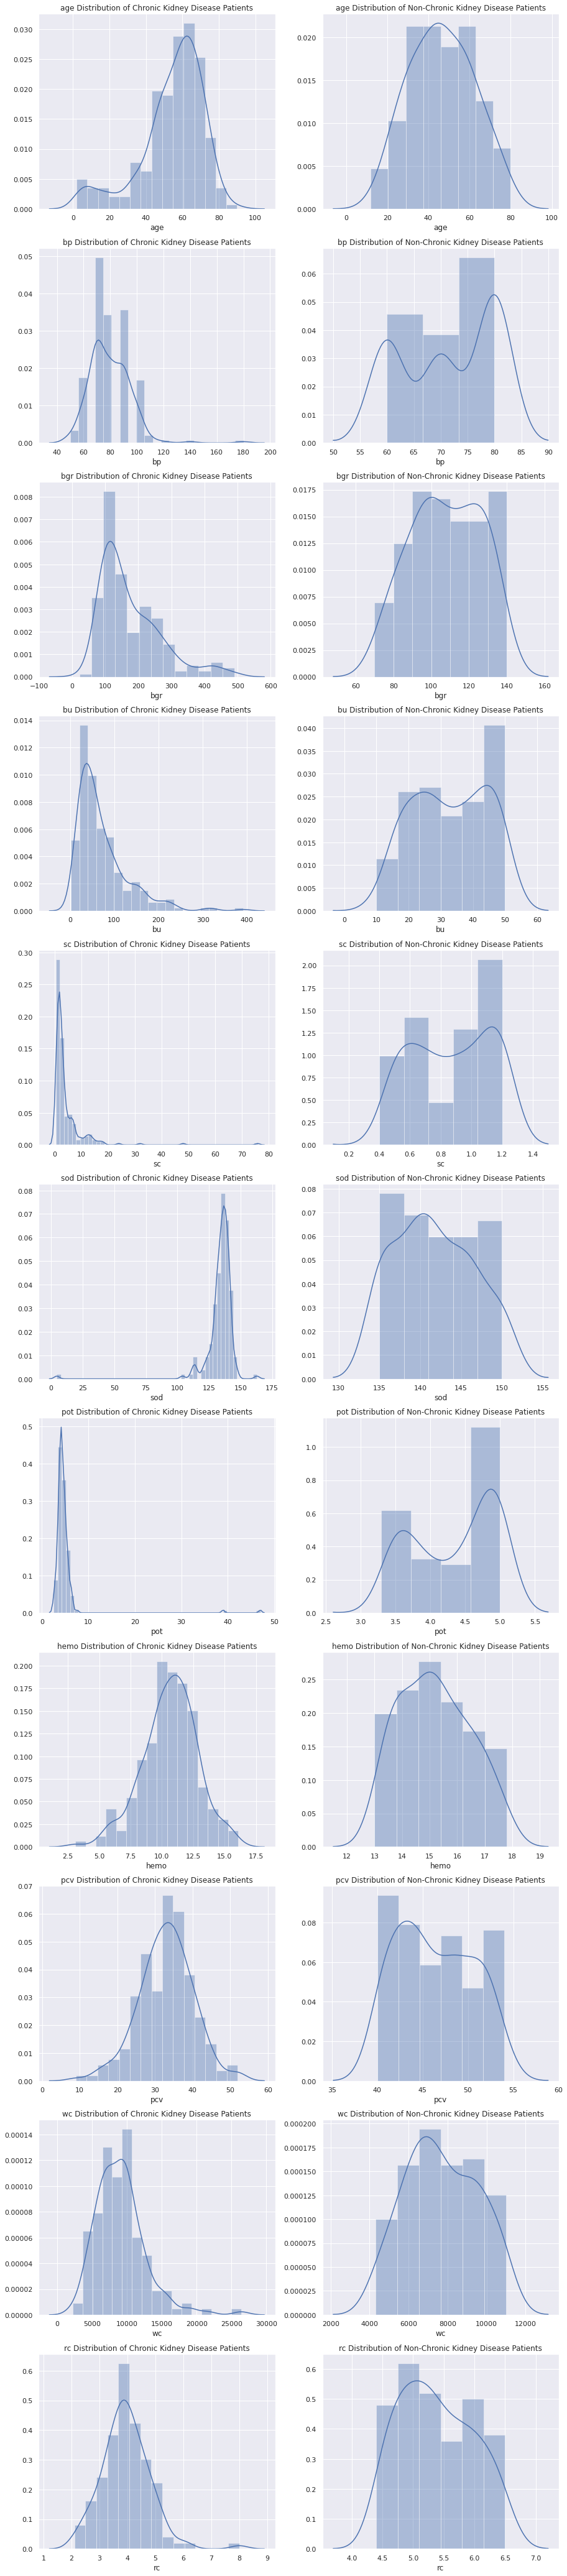

In [8]:
figs, ax = plt.subplots(11, 2, figsize = (15, 75))
for feature, i in zip(numerical, range(0, len(numerical))):
    sns.distplot(data[data['classification']=='ckd'][feature], ax=ax[i, 0])
    sns.distplot(data[data['classification']=='notckd'][feature], ax=ax[i, 1])
    ax[i, 0].set_title('{} Distribution of Chronic Kidney Disease Patients'.format(feature))
    ax[i, 1].set_title('{} Distribution of Non-Chronic Kidney Disease Patients'.format(feature))

#### CKD and Non-CKD Patient Distribution of Categorical Features

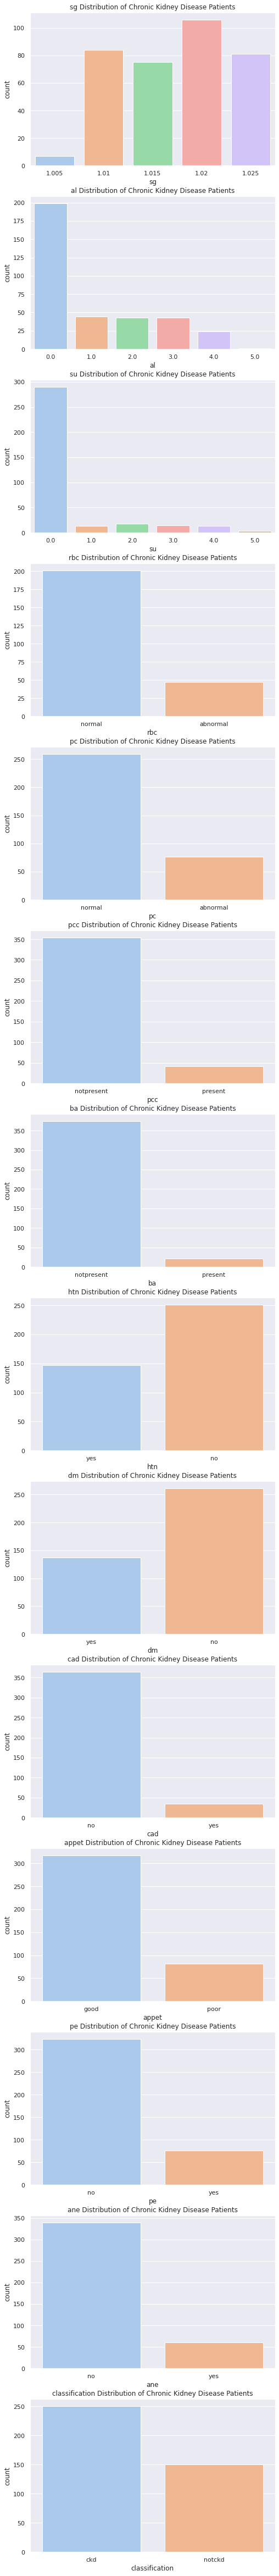

In [9]:
figs, ax = plt.subplots(14, 1, figsize = (8, 85))
for feature, i in zip(categorical, range(0, len(categorical))):
    sns.countplot(x = feature, data=data, ax=ax[i], palette='pastel')
    ax[i].set_title('{} Distribution of Chronic Kidney Disease Patients'.format(feature))

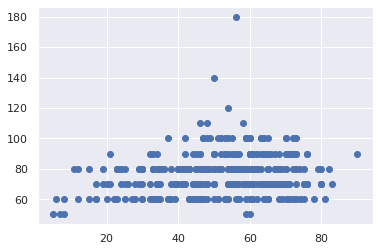

In [11]:
plt.scatter(data['age'],data['bp'])

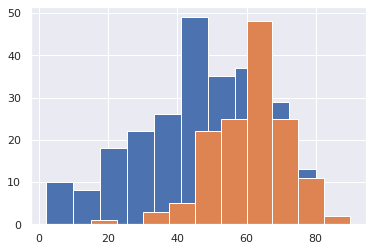

In [12]:
data[data['htn']=='no']['age'].hist()
data[data['htn']=='yes']['age'].hist()


In [13]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd


The target variable is transformed to a nominal data type. The 'ckd' represents 1 and 'notckd' represents 0. 

In [14]:
ohe_label = pd.get_dummies(data['classification']).drop('notckd', axis=1)

data = data.drop('classification', axis=1)
data = pd.concat([data, ohe_label], axis=1)


### Train and Test Split
The dataset is split into 70% train set and 30% test split for the machine learning modeling.

In [18]:
X = data.iloc[:,:-1]
y = data['ckd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=40)

print("rows in training set: %f" % len(X_train))
print("rows in test set: %f" % len(X_test))


rows in training set: 280.000000
rows in test set: 120.000000


### Feature Engineering <a class="anchor" id="fe-bullet"></a>

#### Handling Missing Data
The missing data is imputed with an interative imputer because some of the datapoints are related to each other. For example, a patient with blood pressure that is in the hypertension stage has to be considered to have hypertension. Hence, the interative imputer is used to fill in the midding patient health information.

In [19]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

age        6
bp         6
sg        32
al        31
su        32
rbc      103
pc        42
pcc        4
ba         4
bgr       31
bu        15
sc        14
sod       65
pot       66
hemo      39
pcv       52
wc        74
rc        90
htn        2
dm         2
cad        2
appet      0
pe         0
ane        0
dtype: int64
age       3
bp        6
sg       15
al       15
su       17
rbc      49
pc       23
pcc       0
ba        0
bgr      13
bu        4
sc        3
sod      22
pot      22
hemo     13
pcv      19
wc       32
rc       41
htn       0
dm        0
cad       0
appet     1
pe        1
ane       1
dtype: int64


In [20]:
data.isnull().sum()/len(data)*100

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
ckd       0.00
dtype: float64

In [41]:
imp = IterativeImputer(max_iter=20, random_state=50)
numerical = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

imp.fit(X_train[numerical])
X_train.loc[:, numerical] = imp.transform(X_train.loc[:,numerical])
X_test.loc[:, numerical] = imp.transform(X_test.loc[:,numerical])


imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

imp.fit(X_train[categorical])
X_train.loc[:,categorical] = imp.transform(X_train[categorical])
X_test.loc[:,categorical] = imp.transform(X_test[categorical])

In [42]:
def impute(train=X_train, test=X_test):
    
    imp = IterativeImputer(max_iter=20, random_state=50)
    numerical = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

    imp.fit(train[numerical])
    train.loc[:,numerical] = imp.transform(train.loc[:,numerical])
    test.loc[:,numerical] = imp.transform(test.loc[:,numerical])


    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    categorical = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

    imp.fit(train[categorical])
    train.loc[:,categorical] = imp.transform(train[categorical])
    test.loc[:,categorical] = imp.transform(test[categorical])
    
    return train, test

#### One Hot Encoding

In [43]:
cat = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

ohe_train = pd.get_dummies(X_train[cat], drop_first=True)
ohe_test = pd.get_dummies(X_test[cat], drop_first=True)

X_train = X_train.drop(cat, axis=1)
X_train = pd.concat([X_train, ohe_train], axis=1)


X_test = X_test.drop(cat, axis=1)
X_test = pd.concat([X_test, ohe_test], axis=1)


In [44]:
def onehotencode(train=X_train, test=X_test):
    
    cat = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

    ohe_train = pd.get_dummies(train[cat], drop_first=True)
    ohe_test = pd.get_dummies(test[cat], drop_first=True)

    train = train.drop(cat, axis=1)
    train = pd.concat([train, ohe_train], axis=1)


    test = test.drop(cat, axis=1)
    test = pd.concat([test, ohe_test], axis=1)

    return(train, test)


#### Standard Scaling
The dataset is scaled with the standard scaling.

In [45]:
scaler = StandardScaler()

numerical = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

X_train_scaled = scaler.fit_transform(X_train[numerical])

X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical).set_index(X_train.index)

X_test_scaled = scaler.transform(X_test[numerical])

X_test_scaled = pd.DataFrame(X_test_scaled, columns = numerical).set_index(X_test.index)


X_train = X_train.drop(numerical, axis=1)
X_train = pd.concat([X_train, X_train_scaled], axis=1)

X_test = X_test.drop(numerical, axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)


In [46]:
def scaler(train=X_train, test=X_test):
    scaler = StandardScaler()

    numerical = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

    X_train_scaled = scaler.fit_transform(train[numerical])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical).set_index(train.index)
    X_test_scaled = scaler.transform(test[numerical])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = numerical).set_index(test.index)


    train = train.drop(numerical, axis=1)
    train = pd.concat([train, X_train_scaled], axis=1)

    test = test.drop(numerical, axis=1)
    test = pd.concat([test, X_test_scaled], axis=1)
    
    return(train, test)


In [60]:
def f1_score(precision, recall):
    return 2*((np.mean(precision)*np.mean(recall))/(np.mean(precision)+np.mean(recall)))

### Machine Learning Models <a class="anchor" id="eleventh-bullet"></a>
#### Logistic Regression Model with L2

In [61]:
'''Simulate 100 Samples'''

lr_l2_test_acc = []
lr_l2_train_acc = []


C = [0.0001 ,0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 300, 500, 1000, 5000]

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)

    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)


    for c in C:
        lr = LogisticRegression(C=c, max_iter=10000).fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        
        c_test_accuracy.append(lr.score(X_test, y_test))
        c_train_accuracy.append(lr.score(X_train, y_train))
        
        
    lr_l2_test_acc.append(c_test_accuracy)
    lr_l2_train_acc.append(c_train_accuracy)
    
lr_l2_test_acc = pd.DataFrame(lr_l2_test_acc)
lr_l2_train_acc = pd.DataFrame(lr_l2_train_acc)   

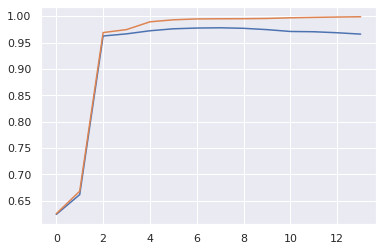

In [62]:
plt.plot(lr_l2_test_acc.mean())
plt.plot(lr_l2_train_acc.mean())


In [63]:
'''Simulate 100 Samples'''

lr_l2_test_acc = []
lr_l2_train_acc = []
con_mat = []
lr_l2_precision = []
lr_l2_recall = []

pcc_25 = []

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    

    lr = LogisticRegression(C=5, max_iter=10000).fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    con_mat.append(confusion_matrix(y_test, y_pred))
    lr_l2_precision.append(precision_score(y_test, y_pred))
    lr_l2_recall.append(recall_score(y_test, y_pred))
    
    lr_l2_test_acc.append(lr.score(X_test, y_test))
    lr_l2_train_acc.append(lr.score(X_train, y_train))
    pcc_25.append(np.sum((y_train.value_counts()/len(y_train))**2)*1.25)
    
con_mat = np.array(con_mat) 
lr_l2_precision = pd.DataFrame(lr_l2_precision)
lr_l2_recall = pd.DataFrame(lr_l2_recall)
lr_l2_test_acc = pd.DataFrame(lr_l2_test_acc)
lr_l2_train_acc = pd.DataFrame(lr_l2_train_acc)   

In [64]:
print(cross_val_score(lr, X_train, y_train, cv=5).mean())

0.9821428571428571


In [65]:
lr_l2_train_acc.mean()

0    0.993071
dtype: float64

In [66]:
np.mean(pcc_25)

0.6649477040816326

In [67]:
lr_l2_recall.mean()

0    0.965442
dtype: float64

In [68]:
lr_l2_test_acc.mean()

0    0.976
dtype: float64

In [69]:
lr_l2_precision.mean()

0    0.995849
dtype: float64

In [70]:
f1_score(lr_l2_precision.mean(),lr_l2_recall.mean())

0.9804097193496977

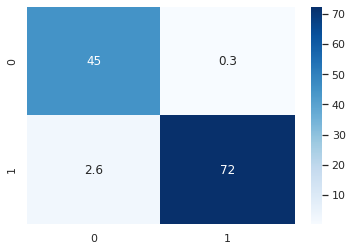

In [71]:
cf_matrix = np.array([[con_mat[:,0,0].mean(),con_mat[:,0,1].mean()],
[con_mat[:,1,0].mean(),con_mat[:,1,1].mean()]])
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')


In [72]:
'''Simulate 100 Samples'''

lr_l2_test_acc = []
lr_l2_train_acc = []
con_mat = []
lr_l2_precision = []
lr_l2_recall = []

pcc_25 = []

samples = 10

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    

    lr_2 = LogisticRegression(C=5, max_iter=10000).fit(X_train, y_train)
    y_pred = lr_2.predict(X_test)
    
    con_mat.append(confusion_matrix(y_test, y_pred))
    lr_l2_precision.append(precision_score(y_test, y_pred))
    lr_l2_recall.append(recall_score(y_test, y_pred))
    
    lr_l2_test_acc.append(lr_2.score(X_test, y_test))
    lr_l2_train_acc.append(lr_2.score(X_train, y_train))
    pcc_25.append(np.sum((y_train.value_counts()/len(y_train))**2)*1.25)
    
con_mat = np.array(con_mat) 
lr_l2_precision = pd.DataFrame(lr_l2_precision)
lr_l2_recall = pd.DataFrame(lr_l2_recall)
lr_l2_test_acc = pd.DataFrame(lr_l2_test_acc)
lr_l2_train_acc = pd.DataFrame(lr_l2_train_acc)   

In [73]:
lr_l2_precision.mean()

0    0.998701
dtype: float64

In [74]:
lr_l2_recall.mean()

0    0.970484
dtype: float64

In [75]:
print("Top Predictor Weight = %f" %np.amax(lr_2.coef_.T))
print("Top Predictor = %s" %X_train.columns[np.argmax(lr_2.coef_.T)])
pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(lr_2.coef_.T)],axis=1, ignore_index=True).sort_values(by=1, ascending=False)


Top Predictor Weight = 3.098003
Top Predictor = al


,0,1
1,al,3.098003
17,sc,2.628803
8,dm_yes,1.893698
7,htn_yes,1.892646
11,pe_yes,1.888947
15,bgr,1.156066
2,su,0.738760
12,ane_yes,0.500357
10,appet_poor,0.296782
14,bp,0.277440


In [76]:
lr_l2_test_acc.mean()

0    0.980833
dtype: float64

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        74

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



#### Logistic Regression Model with L1

In [78]:
'''Simulate 100 samples'''


lr_l1_test_acc = []
lr_l1_train_acc = []

C = [0.00001 ,0.0001 ,0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 300, 500, 1000, 10000]

samples = 10

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    

    for c in C:
        lr_l1 = LogisticRegression(C=c,penalty='l1', solver='liblinear',
                                max_iter=1000).fit(X_train, y_train)
        
        y_pred = lr_l1.predict(X_test)
        
        c_test_accuracy.append(lr_l1.score(X_test, y_test))
        c_train_accuracy.append(lr_l1.score(X_train, y_train))

        
    lr_l1_test_acc.append(c_test_accuracy)
    lr_l1_train_acc.append(c_train_accuracy)


lr_l1_test_acc = pd.DataFrame(lr_l1_test_acc)
lr_l1_train_acc = pd.DataFrame(lr_l1_train_acc)    

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [79]:
plt.plot(lr_l1_test.mean())
plt.plot(lr_l1_train.mean())


NameError: name 'lr_l1_test' is not defined

In [ ]:
'''Simulate 100 samples'''


lr_l1_test_acc = []
lr_l1_train_acc = []
lr_l1_precision = []
lr_l1_recall = []

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    

    lr_l1 = LogisticRegression(C=6,penalty='l1', solver='liblinear',
                            max_iter=10000).fit(X_train, y_train)
    
    y_pred = lr_l1.predict(X_test)
    
    lr_l1_precision.append(precision_score(y_test, y_pred))
    lr_l1_recall.append(recall_score(y_test, y_pred))
        
    lr_l1_test_acc.append(lr_l1.score(X_test, y_test))
    lr_l1_train_acc.append(lr_l1.score(X_train, y_train))

lr_l1_test_acc = pd.DataFrame(lr_l1_test_acc)
lr_l1_train_acc = pd.DataFrame(lr_l1_train_acc)    

In [ ]:
np.mean(lr_l1_recall)

In [ ]:
np.mean(lr_l1_precision)

In [ ]:
f1_score(np.mean(lr_l1_precision),np.mean(lr_l1_recall))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
print("Top Predictor Weight = %f" %np.amax(lr_l1.coef_.T))
print("Top Predictor = %s" %X_train.columns[np.argmax(lr_l1.coef_.T)])
pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(lr_l1.coef_.T)],axis=1, ignore_index=True).sort_values(by=1, ascending=False)


#### Support Vector Machine SVM L2

In [ ]:
'''Simulate 100 Samples'''
svm_l2_test_acc = []
svm_l2_train_acc = []


C = [0.00001, 0.0001, 0.001, 0.01,0.1,1, 5, 10, 20, 30, 40, 50, 100, 200, 300, 500, 750, 1000, 2000, 5000, 10000,100000]

samples = 20

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)

    for c in C:
        svm = LinearSVC(C=c, penalty="l2", max_iter=1000000).fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        c_test_accuracy.append(svm.score(X_test, y_test))
        c_train_accuracy.append(svm.score(X_train, y_train))
    
    svm_l2_test_acc.append(c_test_accuracy)
    svm_l2_train_acc.append(c_train_accuracy)
    
svm_l2_test_acc = pd.DataFrame(svm_l2_test_acc)
svm_l2_train_acc = pd.DataFrame(svm_l2_train_acc)   


In [ ]:
plt.plot(svm_l2_test_acc.mean())
plt.plot(svm_l2_train_acc.mean())


In [ ]:
'''Simulate 100 Samples'''
svm_l2_test_acc = []
svm_l2_train_acc = []

svm_l2_precision = []
svm_l2_recall = []

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)


    svm = LinearSVC(C=0.1, penalty="l2", max_iter=1000000).fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    svm_l2_test_acc.append(svm.score(X_test, y_test))
    svm_l2_train_acc.append(svm.score(X_train, y_train))
    
    svm_l2_precision.append(precision_score(y_test, y_pred))
    svm_l2_recall.append(recall_score(y_test, y_pred))
    
svm_l2_test_acc = pd.DataFrame(svm_l2_test_acc)
svm_l2_train_acc = pd.DataFrame(svm_l2_train_acc)   


In [ ]:
svm_l2_test_acc.mean()

In [ ]:
np.mean(svm_l2_precision)

In [ ]:
np.mean(svm_l2_recall)

In [ ]:
f1_score(np.mean(svm_l2_precision),np.mean(svm_l2_recall))

In [ ]:
print("Top Predictor Weight = %f" %np.amax(svm.coef_.T))
print("Top Predictor = %s" %X_train.columns[np.argmax(svm.coef_.T)])
pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(svm.coef_.T)],axis=1, ignore_index=True).sort_values(by=1, ascending=False)


#### Support Vector Machine SVM L1

In [ ]:
'''Simulate 100 Samples'''
svm_l1_test_acc = []
svm_l1_train_acc = []


C = [0.00001, 0.0001, 0.001, 0.01,0.1,1, 5, 10, 20, 30, 40, 50, 100, 200, 300, 500, 750, 1000, 2000, 5000, 10000,100000]

samples = 20

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
   

    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    

    for c in C:
        svm = LinearSVC(C=c, penalty="l1", max_iter=1000000, dual=False).fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        c_test_accuracy.append(svm.score(X_test, y_test))
        c_train_accuracy.append(svm.score(X_train, y_train))
    
    svm_l1_test_acc.append(c_test_accuracy)
    svm_l1_train_acc.append(c_train_accuracy)
    
svm_l1_test_acc = pd.DataFrame(svm_l1_test_acc)
svm_l1_train_acc = pd.DataFrame(svm_l1_train_acc)   


In [ ]:
plt.plot(svm_l1_test_acc.mean())
plt.plot(svm_l1_train_acc.mean())


In [ ]:
'''Simulate 100 Samples'''
svm_l1_test_acc = []
svm_l1_train_acc = []

svm_l1_precision = []
svm_l1_recall = []

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)


    svm = LinearSVC(C=1, penalty="l1", dual=False, max_iter=1000000).fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    svm_l1_test_acc.append(svm.score(X_test, y_test))
    svm_l1_train_acc.append(svm.score(X_train, y_train))
    
    svm_l1_precision.append(precision_score(y_test, y_pred))
    svm_l1_recall.append(recall_score(y_test, y_pred))
    
svm_l1_test_acc = pd.DataFrame(svm_l1_test_acc)
svm_l1_train_acc = pd.DataFrame(svm_l1_train_acc)   


In [ ]:
svm_l1_test_acc.mean()

In [ ]:
svm_l1_train_acc.mean()

In [ ]:
np.mean(svm_l1_precision)

In [ ]:
np.mean(svm_l1_recall)

In [ ]:
f1_score(np.mean(svm_l1_precision),np.mean(svm_l1_recall))

In [ ]:
print("Top Predictor Weight = %f" %np.amax(svm.coef_.T))
print("Top Predictor = %s" %X_train.columns[np.argmax(svm.coef_.T)])
pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(svm.coef_.T)],axis=1, ignore_index=True).sort_values(by=1, ascending=False)


#### Gradient Boosting

In [ ]:
'''Simulate 100 Samples'''
svm_l1_test_acc = []
svm_l1_train_acc = []
best_param = []
scores = []

parameters = {'learning_rate':[0.01,0.1,1],
              'n_estimators':[10,100,200],
              'max_depth':[1,3,6],
              'random_state':[42]
             }

samples = 20

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
   

    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)

    

    gbc = GradientBoostingClassifier()
    clf = GridSearchCV(gbc, parameters)
    clf.fit(X_train, y_train)
    
    best_param.append(clf.best_estimator_)
    scores.append(clf.best_score_)

    #gbc_test_acc.append(clf.score(X_test, y_test))
    #gbc_train_acc.append(clf.score(X_train, y_train))
    
    #gbc_precision.append(precision_score(y_test, y_pred))
    #gbc_recall.append(recall_score(y_test, y_pred))
    
#gbc_test_acc = pd.DataFrame(gbc_test_acc)
#gbc_train_acc = pd.DataFrame(gbc_train_acc)   


In [ ]:
best_param

In [ ]:
'''Simulate 100 Samples'''
gbc_test_acc = []
gbc_train_acc = []

gbc_precision = []
gbc_recall = []

samples = 100

X = data.iloc[:,:-1]
y = data['ckd']

for seedN in range(samples):
    
    c_test_accuracy = []
    c_train_accuracy = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=seedN)
    
    X_train, X_test = impute(X_train, X_test)
    X_train, X_test = onehotencode(X_train, X_test)
    X_train, X_test = scaler(X_train, X_test)
    
    gbc = GradientBoostingClassifier(learning_rate=0.4,
                                     n_estimators=121,
                                     max_depth=2,
                                     random_state=42).fit(X_train, y_train)
    y_pred = gbc.predict(X_test)

    gbc_test_acc.append(gbc.score(X_test, y_test))
    gbc_train_acc.append(gbc.score(X_train, y_train))
    
    gbc_precision.append(precision_score(y_test, y_pred))
    gbc_recall.append(recall_score(y_test, y_pred))
    
gbc_test_acc = pd.DataFrame(gbc_test_acc)
gbc_train_acc = pd.DataFrame(gbc_train_acc)   


In [ ]:
gbc_test_acc.mean()

In [ ]:
np.mean(gbc_recall)

In [ ]:
gbc_train_acc.mean()

In [ ]:
f1_score = 2*((np.mean(gbc_precision)*np.mean(gbc_recall))/(np.mean(gbc_precision)+np.mean(gbc_recall)))
f1_score

In [ ]:
print("Top Predictor Weight = %f" %np.amax(gbc.feature_importances_.T))
print("Top Predictor = %s" %X_train.columns[np.argmax(gbc.feature_importances_.T)])
pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(gbc.feature_importances_.T)],axis=1, ignore_index=True).sort_values(by=1, ascending=False)



In [ ]:
gbc.feature_importances_

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

## 4. Results and Discussion
Table 2 summarizes the result of the machine learning models with their corresponding train accuracy, test accuracy, best parameters, and top predictor variable. All the machine learning models has shown to have exceeded the 1.25 PCC = 66.49%. Hence, all the machine learning models are successful in predicting Chronic Kidney Disease based on the mentioned health information of the patient. In addition, all models except for Gradient Boosting Classifier have albumin as the top predictor variable while hemoglobin is the top predictor variable for the Gradient Boosting Classifier. Overall, all the machine learning models are neither overfitting nor undefitting.

Table 3 summarizes the precision, recall, and F-1 score of each machine learning model provided. In diagnosing Chronic Kidney disease, it is preferred that one without CKD is tagged positive compared to a patient with CKD being tagged negative. Hence, the precision is a prioritized metrics for success compared to Recall for this study. A higher precision would entail that there is a smaller percentage of false positive. On the other hand, higher recall also shows that the model predicted the actual patient data into its proper classification correctly. The F-1 Score shows the balance between the precision and recall. Overall, all the models have shown to have very high and successful precision, recall, and F-1 scores.


### Table 2. Machine Learning Model Results
|       Machine Learning Model       | Train Accuracy | Test Accuracy |                    Best Parameters                   | Top Predictor Variable |
|:----------------------------------:|:--------------:|:-------------:|:----------------------------------------------------:|:----------------------:|
|    Gradient Boosting Classifier    |     100%     |     98.63%    |                         learning_rate = 4, max_depth = 2, n_estimators = 121                       |         hemo        |
| Linear Support Vector Machine (L1) |     99.39%     |     97.24%     |                          c=1                         |         al       |
| Linear Support Vector Machine (L2) |      98.91%     |     97.21%    |                          c=1                         |         al        |
|      Logistic Regression (L1)      |     99.29%     |     97.25%    |                          c=6                         |         al        |
|      Logistic Regression (L2)      |      98.91%    |     97.6%    | c=6 |       al      |

### Table 3. Precision, Recall, and F-1 Score

|       Machine Learning Model       | Precision | Recall | F-1 Score |
|:----------------------------------:|:---------:|:------:|:---------:|
|    Gradient Boosting Classifier    |   99.55%  | 98.25% |   98.89%  |
| Linear Support Vector Machine (L1) |   99.72%  | 95.84% |   97.74%  |
| Linear Support Vector Machine (L2) |   99.80%  | 95.71% |   97.71%  |
|      Logistic Regression (L1)      |   99.49%  | 96.12% |   97.77%  |
|      Logistic Regression (L2)      |   99.87%  | 97.05% |   98.44%  |

## 5. Conclusion
Based on the Table 2 and Table 3, the Gradient Boosting Classifier has the best predicting power compared to all the other machine learning models below. It has the best train and test accuracy combination. It also has a very high precision score, the highest recall score, and the highest F-1 score. In conclusion, the Gradient Boosting Classifier is the best model for predicting whether one has CKD or not with the feature hemoglobin.

Doctors could use the Gradient Boosting Classifier model to predict whether a patient has CKD or not without the use of the GFR formula. This allows CKD diagnosis to work without certain patient information - ethnicity, gender, height, and weight.


## 6. Recommendation

The study further recommends that the model could be expanded with features that deal with patient ethnicity. Certain ethnicity such as African Americans, Hispanics, American Indians, and Alaska Natives are more likely to have CKD compared to other races (NIH, n.d.). In other words, genetics could play a role in determining CKD.

Moreover, the study could also be expanded with diagnosing different stages of CKD with machine learning. There are five stages of CKD based on the GFR measure that could be considered for in-depth diagnosis. Machine learning models could be further used to diagnose the five types of CKD stages based on patient health information.

## 7. References
American Kidney Fund (n.d.). Stage of Chronic Kidney Disease. American Kidney Fund. Retrieved from https://www.kidneyfund.org/kidney-disease/chronic-kidney-disease-ckd/stages-of-chronic-kidney-disease/.

Rubini, L. (2015). Chronic_Kidney_Disease Data Set. [https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease]. Karaikudi, Tamilnadu: Alangappa University, Department of Computer Science and Engineering.

National Kidney Foundation (n.d.) GFR Calculator. National Kidney Foundation. Retrieved from https://www.kidney.org/professionals/kdoqi/gfr_calculator.

National Institute of Diabetes and Digestive and Kidney Disease. (n.d.) Race, Ethnicit, & Kidney Disease. NIH. Retrieved from https://www.niddk.nih.gov/health-information/kidney-disease/race-ethnicity.

Webster, A., Nagler, E., Morton, R., & Masson, P. (2017). Chronic Kidney Disease. The Lancet, 389 (10075), 1238-1252. https://doi.org/10.1016/S0140-6736(16)32064-5.